In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud


In [5]:
data=pd.read_csv("twitter_sentiment.csv")
data.sample(5)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
72399,8803,Nvidia,Positive,This is so so awesome! But Congratulations to....
9208,9582,Overwatch,Positive,gna start play overwatch sometimes this game i...
29295,638,ApexLegends,Irrelevant,William Wilson.
24179,4545,Google,Irrelevant,aight someone saw me rt this and was like why ...
40755,1393,Battlefield,Negative,@NiklasAstrand Hey i was hoping you can use he...


In [6]:
data.shape

(75681, 4)

In [7]:
data=data[['Positive','im getting on borderlands and i will murder you all ,']].reset_index(drop=True)
data.head()

,Positive,"im getting on borderlands and i will murder you all ,"
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...


In [8]:
data.columns=['sentiments','text']
data.sample(5)

,sentiments,text
15198,Positive,A small screenshot of my love for me redd.it /...
30194,Neutral,⁦RhandlerR⁩ ⁦RhandlerR⁩ . . Check out We dont...
34744,Negative,going to make a TwitLonger into what I might q...
63341,Negative,@EAMaddenNFL . These glitches got to go!
42476,Irrelevant,Best Among us Moments Ever <unk> via Daily FNB...


In [9]:
data.shape

(75681, 2)

In [10]:
data['sentiments'].unique()

array(['Positive', 'Neutral', 'Negative', 'Irrelevant'], dtype=object)

In [11]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75681 entries, 0 to 75680
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sentiments  75681 non-null  object
 1   text        74995 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [12]:
data['sentiments'].value_counts()


sentiments
Negative      22808
Positive      21108
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64

In [13]:
data.duplicated().sum()
data.drop_duplicates(keep='first',inplace=True)

In [14]:
data.shape

(70253, 2)

<Axes: xlabel='sentiments'>

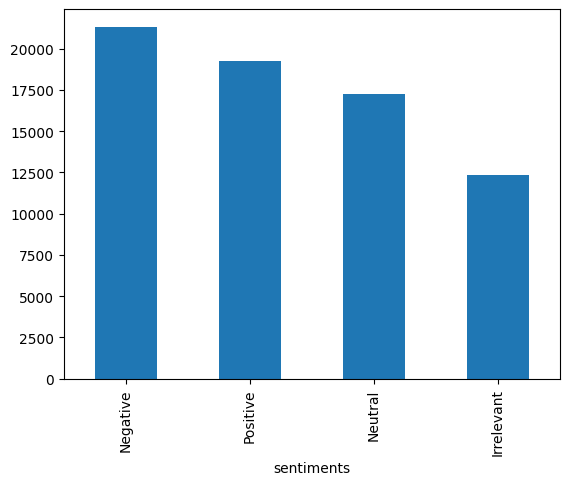

In [15]:
data['sentiments'].value_counts().plot(kind='bar')

In [16]:
data.isna().sum()

sentiments    0
text          4
dtype: int64

In [17]:
data.dropna(subset=['text'],inplace=True)
data.shape

(70249, 2)

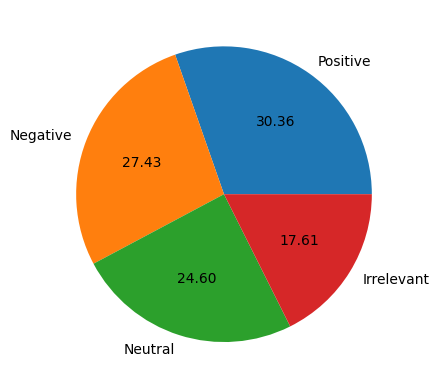

In [18]:
plt.pie(data['sentiments'].value_counts(),labels=['Positive','Negative','Neutral','Irrelevant'],autopct='%0.2f')
plt.show()

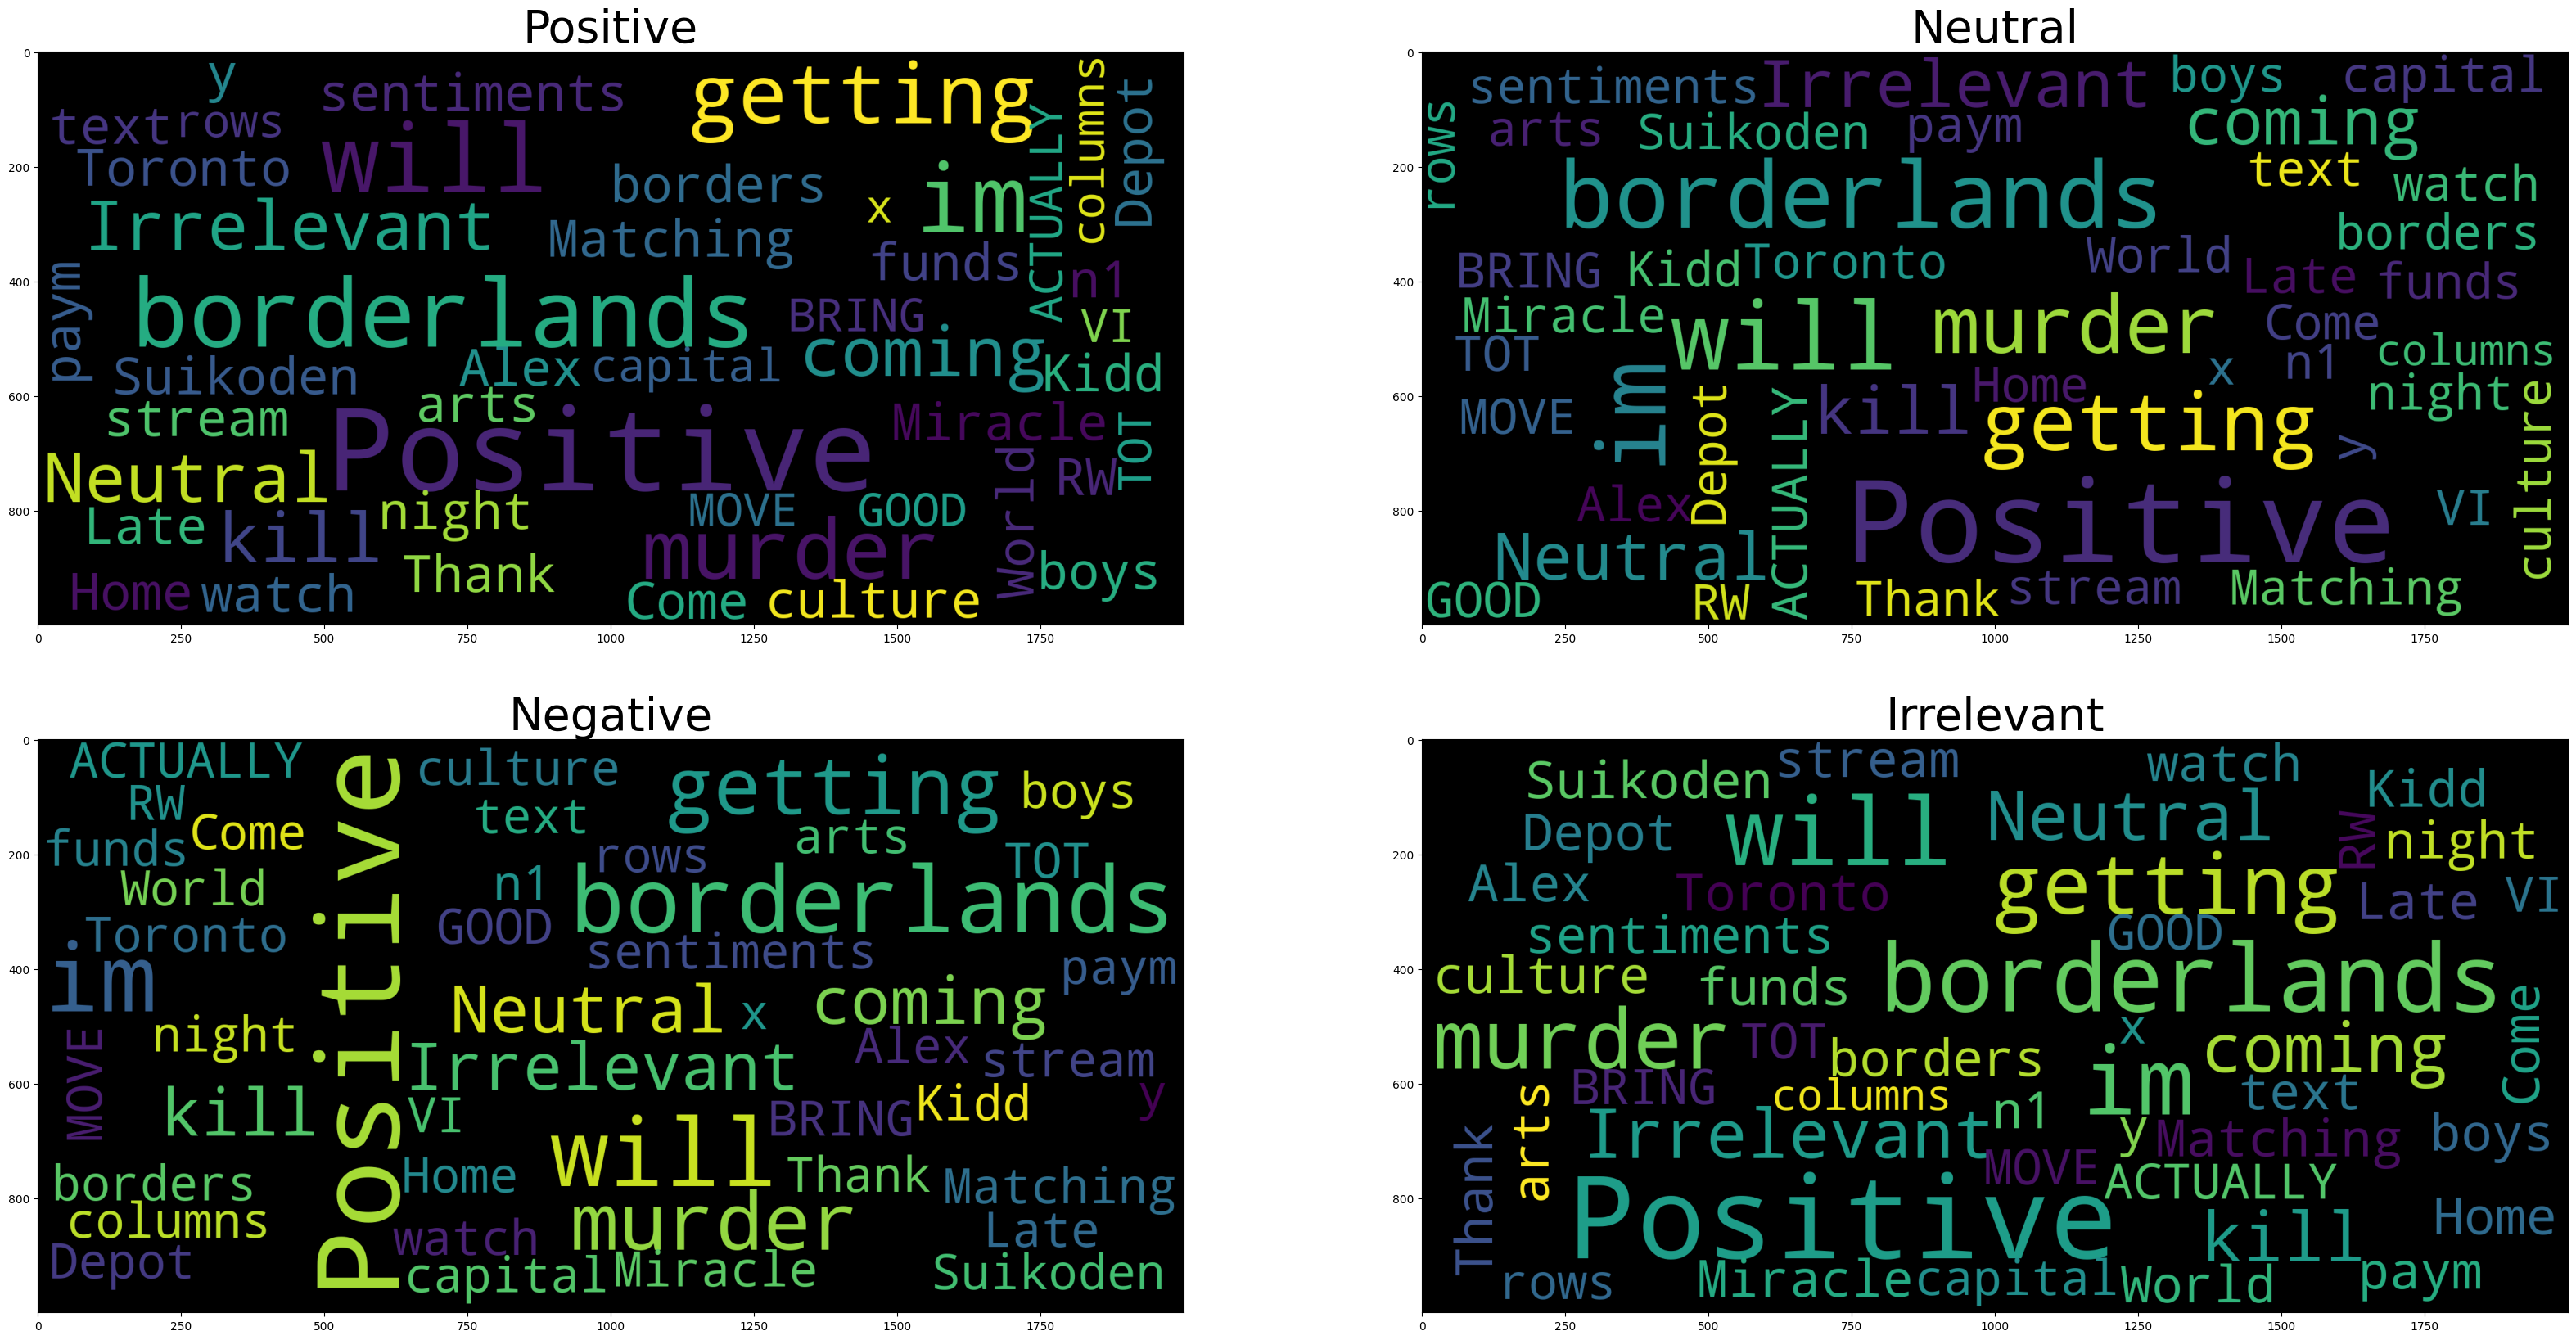

In [19]:
plt.figure(figsize=(40,20))
for index,col in enumerate(data['sentiments'].unique()):
    plt.subplot(2,2,index+1)
    data1=data['sentiments']==col
    data2=data['text']
    wordcloud=WordCloud(max_words=200,scale=5,min_font_size=4,background_color='black',max_font_size=40,mode='RGB').generate(str(data))
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
